In [123]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import SIR_utils as sir
from get_mask_dates import *

In [124]:
mandate = pd.read_csv('stay_at_home_and_masks.csv')
def get_date(dataframe, state):
    state = dataframe.loc[dataframe['state'] == state]
    date = np.array(state['mask_date'])[0].split('-')[::-1]
    return date[0] + '-' + date[1] + '-' + date[2]

#print(mandate)

   state            Unnamed: 1  Population   mask_date  mask_in_effect  \
0     AL               Alabama     4934190  16-07-2021           False   
1     AK                Alaska      724357         NaN           False   
2     AZ               Arizona     7520100         NaN           False   
3     AR              Arkansas     3033950  20-07-2020           False   
4     CA            California    39613500  18-06-2020            True   
5     CO              Colorado     5893630  17-07-2021            True   
6     CT           Connecticut     3552820  14-08-2020            True   
7     DE              Delaware      990334  05-01-2021            True   
8     DC  District of Columbia      714153  22-07-2020            True   
9     FL               Florida    21944600         NaN           False   
10    GA               Georgia    10830000         NaN           False   
11    HI                Hawaii     1406430  17-04-2020            True   
12    ID                 Idaho     186

In [125]:
# state = "new-jersey"
# state_abbr = "NJ"
# state = "florida"
# state_abbr = "FL"
state = "georgia"
state_abbr = "GA"
# state = "new-york"
# state_abbr = "NY"

time_dataframe = pd.read_csv("{}-history.csv".format(state))
#print(time_dataframe)

dates = time_dataframe["date"][::-1]
removed = time_dataframe["positiveCasesViral"][::-1]
indices = np.array(1 - np.isnan(removed)).astype(np.bool)

dates = np.array(dates)[indices]
rem = np.array(removed[indices])

#print(dates)
#print(rem)

           date state    death  deathConfirmed  deathIncrease  deathProbable  \
0    2021-03-07    GA  17906.0         15598.0              1         2308.0   
1    2021-03-06    GA  17905.0         15597.0             90         2308.0   
2    2021-03-05    GA  17815.0         15526.0             65         2289.0   
3    2021-03-04    GA  17750.0         15462.0            125         2288.0   
4    2021-03-03    GA  17625.0         15349.0            145         2276.0   
..          ...   ...      ...             ...            ...            ...   
364  2020-03-08    GA      NaN             NaN              0            NaN   
365  2020-03-07    GA      NaN             NaN              0            NaN   
366  2020-03-06    GA      NaN             NaN              0            NaN   
367  2020-03-05    GA      NaN             NaN              0            NaN   
368  2020-03-04    GA      NaN             NaN              0            NaN   

     hospitalized  hospitalizedCumulati

<ipython-input-125-735d2b507d70>:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = np.array(1 - np.isnan(removed)).astype(np.bool)


In [126]:
window = 14
infectious, infectious_rate = sir.compute_number_infectious(rem, window)

rem = rem[:len(infectious)]

population = np.array(mandate[mandate['state'] == state_abbr]['Population']) 
sus = population - infectious - rem
#print(sus)

299
[10803880.35714286 10803151.92857143 10802057.78571429 10801062.5
 10800748.07142857 10800009.64285714 10799645.42857143 10798664.64285714
 10797920.57142857 10797243.14285714 10796782.28571429 10795887.78571429
 10795400.35714286 10794742.92857143 10794018.78571429 10793484.
 10792676.92857143 10792200.21428571 10791635.78571429 10791237.78571429
 10790601.42857143 10789692.5        10788920.57142857 10788110.35714286
 10787212.5        10786514.85714286 10786002.21428571 10785948.5
 10784896.21428571 10784222.64285714 10783607.64285714 10782962.92857143
 10782250.07142857 10781610.85714286 10781016.5        10780310.57142857
 10779362.64285714 10778565.57142857 10777798.14285714 10777187.5
 10776543.64285714 10775720.35714286 10774919.92857143 10773875.42857143
 10772987.57142857 10771900.14285714 10770924.07142857 10770085.78571429
 10769335.35714286 10768240.92857143 10767173.92857143 10765956.42857143
 10764083.14285714 10763097.92857143 10761848.         10759979.71428571
 10

In [130]:
row = mask_date_to_all_states(state_abbr, "all-states-history.csv", 'stay_at_home_and_masks.csv', 
                             item="stay_at_home_start")
bools = time_dataframe["date"] == np.array(row["date"])[0]
index_home = len(bools) - np.arange(len(bools))[bools]

try:
    row = mask_date_to_all_states(state_abbr, "all-states-history.csv", 'stay_at_home_and_masks.csv', 
                                 item="stay_at_home_end")
    bools = time_dataframe["date"] == np.array(row["date"])[0]
    index_out = len(bools) - np.arange(len(bools))[bools]
except:
    print("no stay at home end")

try:
    row = mask_date_to_all_states(state_abbr, "all-states-history.csv", 'stay_at_home_and_masks.csv', )
    bools = time_dataframe["date"] == np.array(row["date"])[0]
    index_mask = len(bools) - np.arange(len(bools))[bools]
except:
    index_mask = None

no stay at home end


no mask mandate


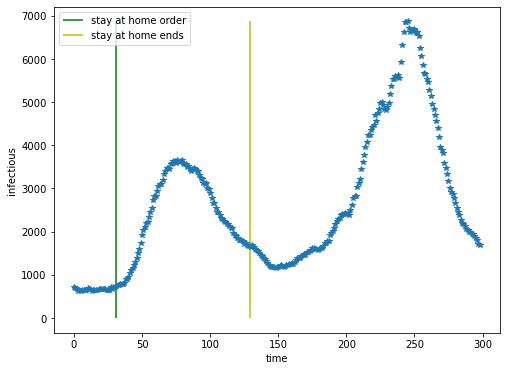

ValueError: Unrecognized marker style 'k^'

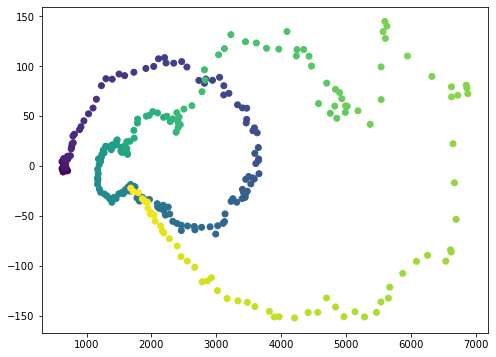

In [148]:
plt.figure(figsize=(8, 6))
plt.plot(times, infectious, "*")
plt.vlines(index_home[0], 0, np.max(infectious), "g", label="stay at home order")
try:
    plt.vlines(index_mask[0], 0, np.max(infectious), "r", label="mask mandate")
except:
    print("no mask mandate")

try:
    plt.vlines(index_out[0], 0, np.max(infectious), "y", label="stay at home ends")
except:
    print("no out time")
plt.xlabel("time")
plt.ylabel("infectious")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(infectious, infectious_rate, c=times)
plt.plot(infectious[index_home[0]], infectious_rate[index_home[0]], "k^",  
           markersize=10)
plt.plot(infectious[index_out[0]], infectious_rate[index_out[0]], marker="k^",  
           markersize=10)
plt.ylabel("di/dt")
plt.ylabel("di/dt")
plt.xlabel("infectious")
plt.show()



In [127]:
times = np.arange(len(rem))
sus_fit = sus / population
inf_fit = infectious / population
rem_fit = rem / population
sir_fitting = sir.moving_averages_fits(times, sus_fit, inf_fit, rem_fit, window=window, 
                                     opt_options={"method":"trust-constr", 
                                                                           "bounds": 
                                                                            [(1e-10, 100), (0, np.inf)]})

In [128]:
print(sir_fitting)

[[1.16703926 1.19422805]
 [0.18571193 0.04660517]
 [2.89121481 3.41706373]
 [3.53142527 4.27827221]
 [1.3627536  1.62869713]
 [1.31903093 1.54167011]
 [1.90611896 2.19526701]
 [1.57601881 1.79556224]
 [1.63846802 1.8670554 ]
 [1.65729665 1.8906735 ]
 [1.77897485 2.00909873]
 [1.96211136 2.24553784]
 [1.70552777 1.95766648]
 [1.61056364 1.83379404]
 [1.46636156 1.6721412 ]
 [1.20863396 1.40389164]
 [1.31563775 1.48812978]
 [1.20002557 1.35368981]
 [1.5346604  1.6797325 ]
 [1.32636734 1.43490531]
 [1.75972571 1.89298483]]


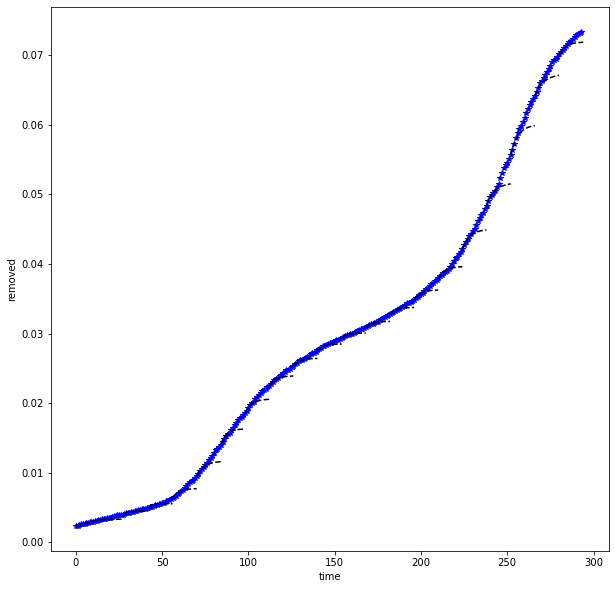

In [129]:
plt.figure(figsize=(10, 10))
for j in range(int(len(times) / window)):
    start = j * window
    stop = start + window
    plt.plot(times[start:stop], rem_fit[start:stop], "b*")
    sol = solve_ivp(sir.sir_ode, [times[start], times[stop]], 
                   [sus_fit[start], inf_fit[start], rem_fit[start]], 
                   args=sir_fitting[j, :], method="LSODA", max_step=0.25)
    plt.plot(sol.t, sol.y[2, :], "k--")
    
plt.xlabel("time")
plt.ylabel("removed")
plt.show()

In [130]:
row = mask_date_to_all_states(state_abbr, "all-states-history.csv", 'stay_at_home_and_masks.csv', 
                             item="stay_at_home_start")
bools = time_dataframe["date"] == np.array(row["date"])[0]
index_home = len(bools) - np.arange(len(bools))[bools]

try:
    row = mask_date_to_all_states(state_abbr, "all-states-history.csv", 'stay_at_home_and_masks.csv', 
                                 item="stay_at_home_end")
    bools = time_dataframe["date"] == np.array(row["date"])[0]
    index_out = len(bools) - np.arange(len(bools))[bools]
except:
    print("no stay at home end")

try:
    row = mask_date_to_all_states(state_abbr, "all-states-history.csv", 'stay_at_home_and_masks.csv', )
    bools = time_dataframe["date"] == np.array(row["date"])[0]
    index_mask = len(bools) - np.arange(len(bools))[bools]
except:
    index_mask = None

no stay at home end


no mask mandate


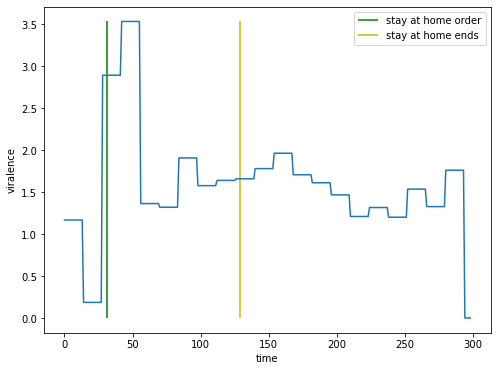

no mask mandate


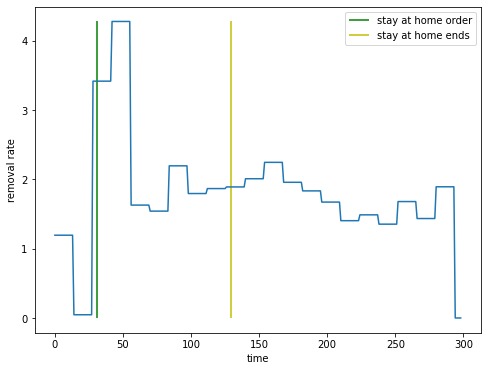

In [131]:
sir_fitting_plot = np.zeros([len(times), 2])
for j in range(int(len(times) / window)):
    sir_fitting_plot[j * window: j * window + window, :] = sir_fitting[j, :]
    
plt.figure(figsize=(8,6))
plt.plot(times, sir_fitting_plot[:, 0])
plt.vlines(index_home[0], 0, np.max(sir_fitting[:, 0]), "g", label="stay at home order")
try:
    plt.vlines(index_mask[0], 0, np.max(sir_fitting[:, 0]), "r", label="mask mandate")
except:
    print("no mask mandate")

try:
    plt.vlines(index_out[0], 0, np.max(sir_fitting[:, 0]), "y", label="stay at home ends")
except:
    print("no out time")
plt.xlabel("time")
plt.ylabel("viralence")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(times, sir_fitting_plot[:, 1])
plt.vlines(index_home[0], 0, np.max(sir_fitting[:, 1]), "g", label="stay at home order")
try:
    plt.vlines(index_mask[0], 0, np.max(sir_fitting[:, 1]), "r", label="mask mandate")
except:
    print("no mask mandate")

try:
    plt.vlines(index_out[0], 0, np.max(sir_fitting[:, 1]), "y", label="stay at home ends")
except:
    print("no out time")
plt.xlabel("time")
plt.ylabel("removal rate")
plt.legend()
plt.show()